# **Importar librerias necesarias:**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
# Recargar el archivo con el delimitador correcto
df = pd.read_csv('/content/bank-full.csv', delimiter=';')

# Mostrar las primeras filas para entender la estructura del archivo
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# **Limpieza de datos:**

In [58]:
# Recargar el archivo con el delimitador correcto
df = pd.read_csv('/content/bank-full.csv', delimiter=';')

# Mostrar las primeras filas para entender la estructura del archivo
df.head()

# Verificar valores nulos
print(df.isnull().sum()) # Changed 'data' to 'df'

# Eliminar duplicados
df = df.drop_duplicates() # Changed 'data' to 'df'

# Manejo de valores desconocidos (reemplazar 'unknown' con NaN)
df = df.replace('unknown', np.nan) # Changed 'data' to 'df'

# Eliminar columnas con alta cardinalidad o poca relevancia
df = df.drop(['contact', 'day', 'month'], axis=1) # Changed 'data' to 'df'

# Imputación de valores faltantes para variables categóricas
for col in df.select_dtypes(include='object').columns: # Changed 'data' to 'df'
    mode_val = df[col].mode()[0] # Changed 'data' to 'df'
    df[col] = df[col].fillna(mode_val) # Changed 'data' to 'df'

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [59]:
# Convert 'y' column to numerical representation (1 for 'yes', 0 for 'no')
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Now calculate the subscription rate
subscription_rate = df['y'].mean()
print(f"Tasa global de suscripción: {subscription_rate:.2%}")

Tasa global de suscripción: 11.70%


In [61]:
# Cargar los datos
data = pd.read_csv('bank-full.csv', sep=';')

# 1. Análisis exploratorio inicial
print("Información del dataset:")
print(data.info())
print("\nEstadísticas descriptivas:")
print(data.describe())
print("\nValores faltantes por columna:")
print(data.isnull().sum())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Estadísticas descriptivas:
                age        balance       

Tasa global de suscripción: 11.70%


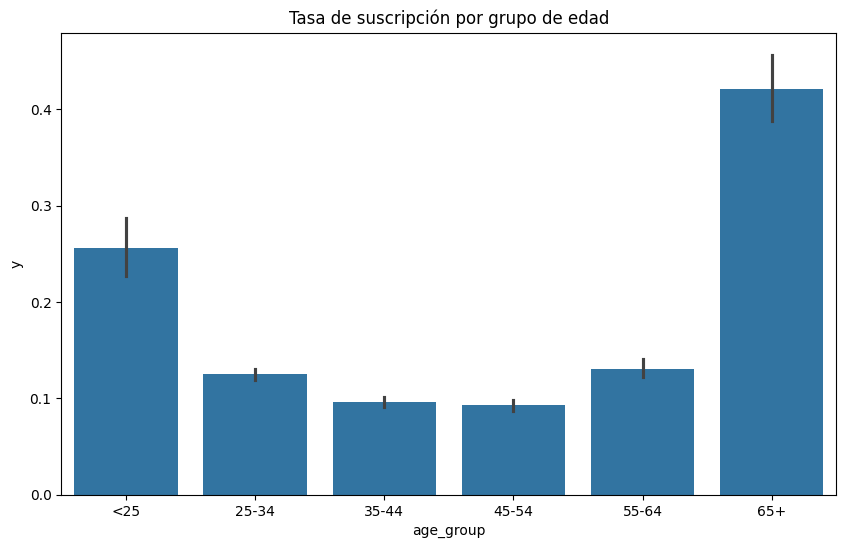

In [60]:
# Tasa de suscripción general
subscription_rate = df['y'].mean()  # Changed 'data' to 'df'
print(f"Tasa global de suscripción: {subscription_rate:.2%}")

# Create age groups
# Define age group bins
bins = [0, 25, 35, 45, 55, 65, np.inf]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column 'age_group' based on the bins
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Suscripción por edad
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='y', data=df)  # Changed 'data' to 'df'
plt.title('Tasa de suscripción por grupo de edad')
plt.show()

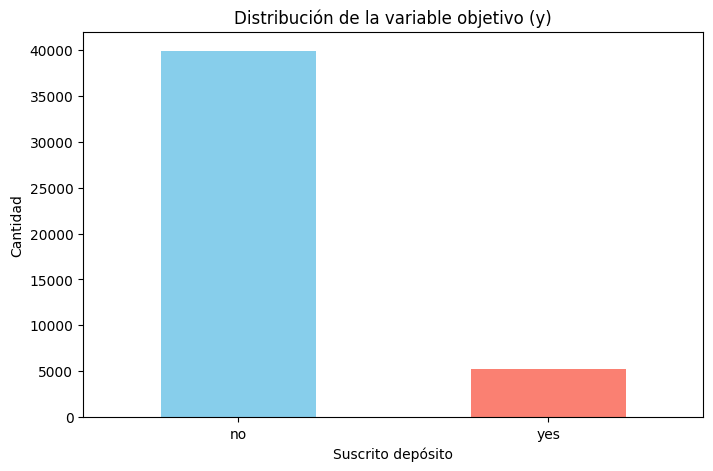

In [62]:
# 2. Análisis de la variable objetivo
plt.figure(figsize=(8,5))
data['y'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de la variable objetivo (y)')
plt.xlabel('Suscrito depósito')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

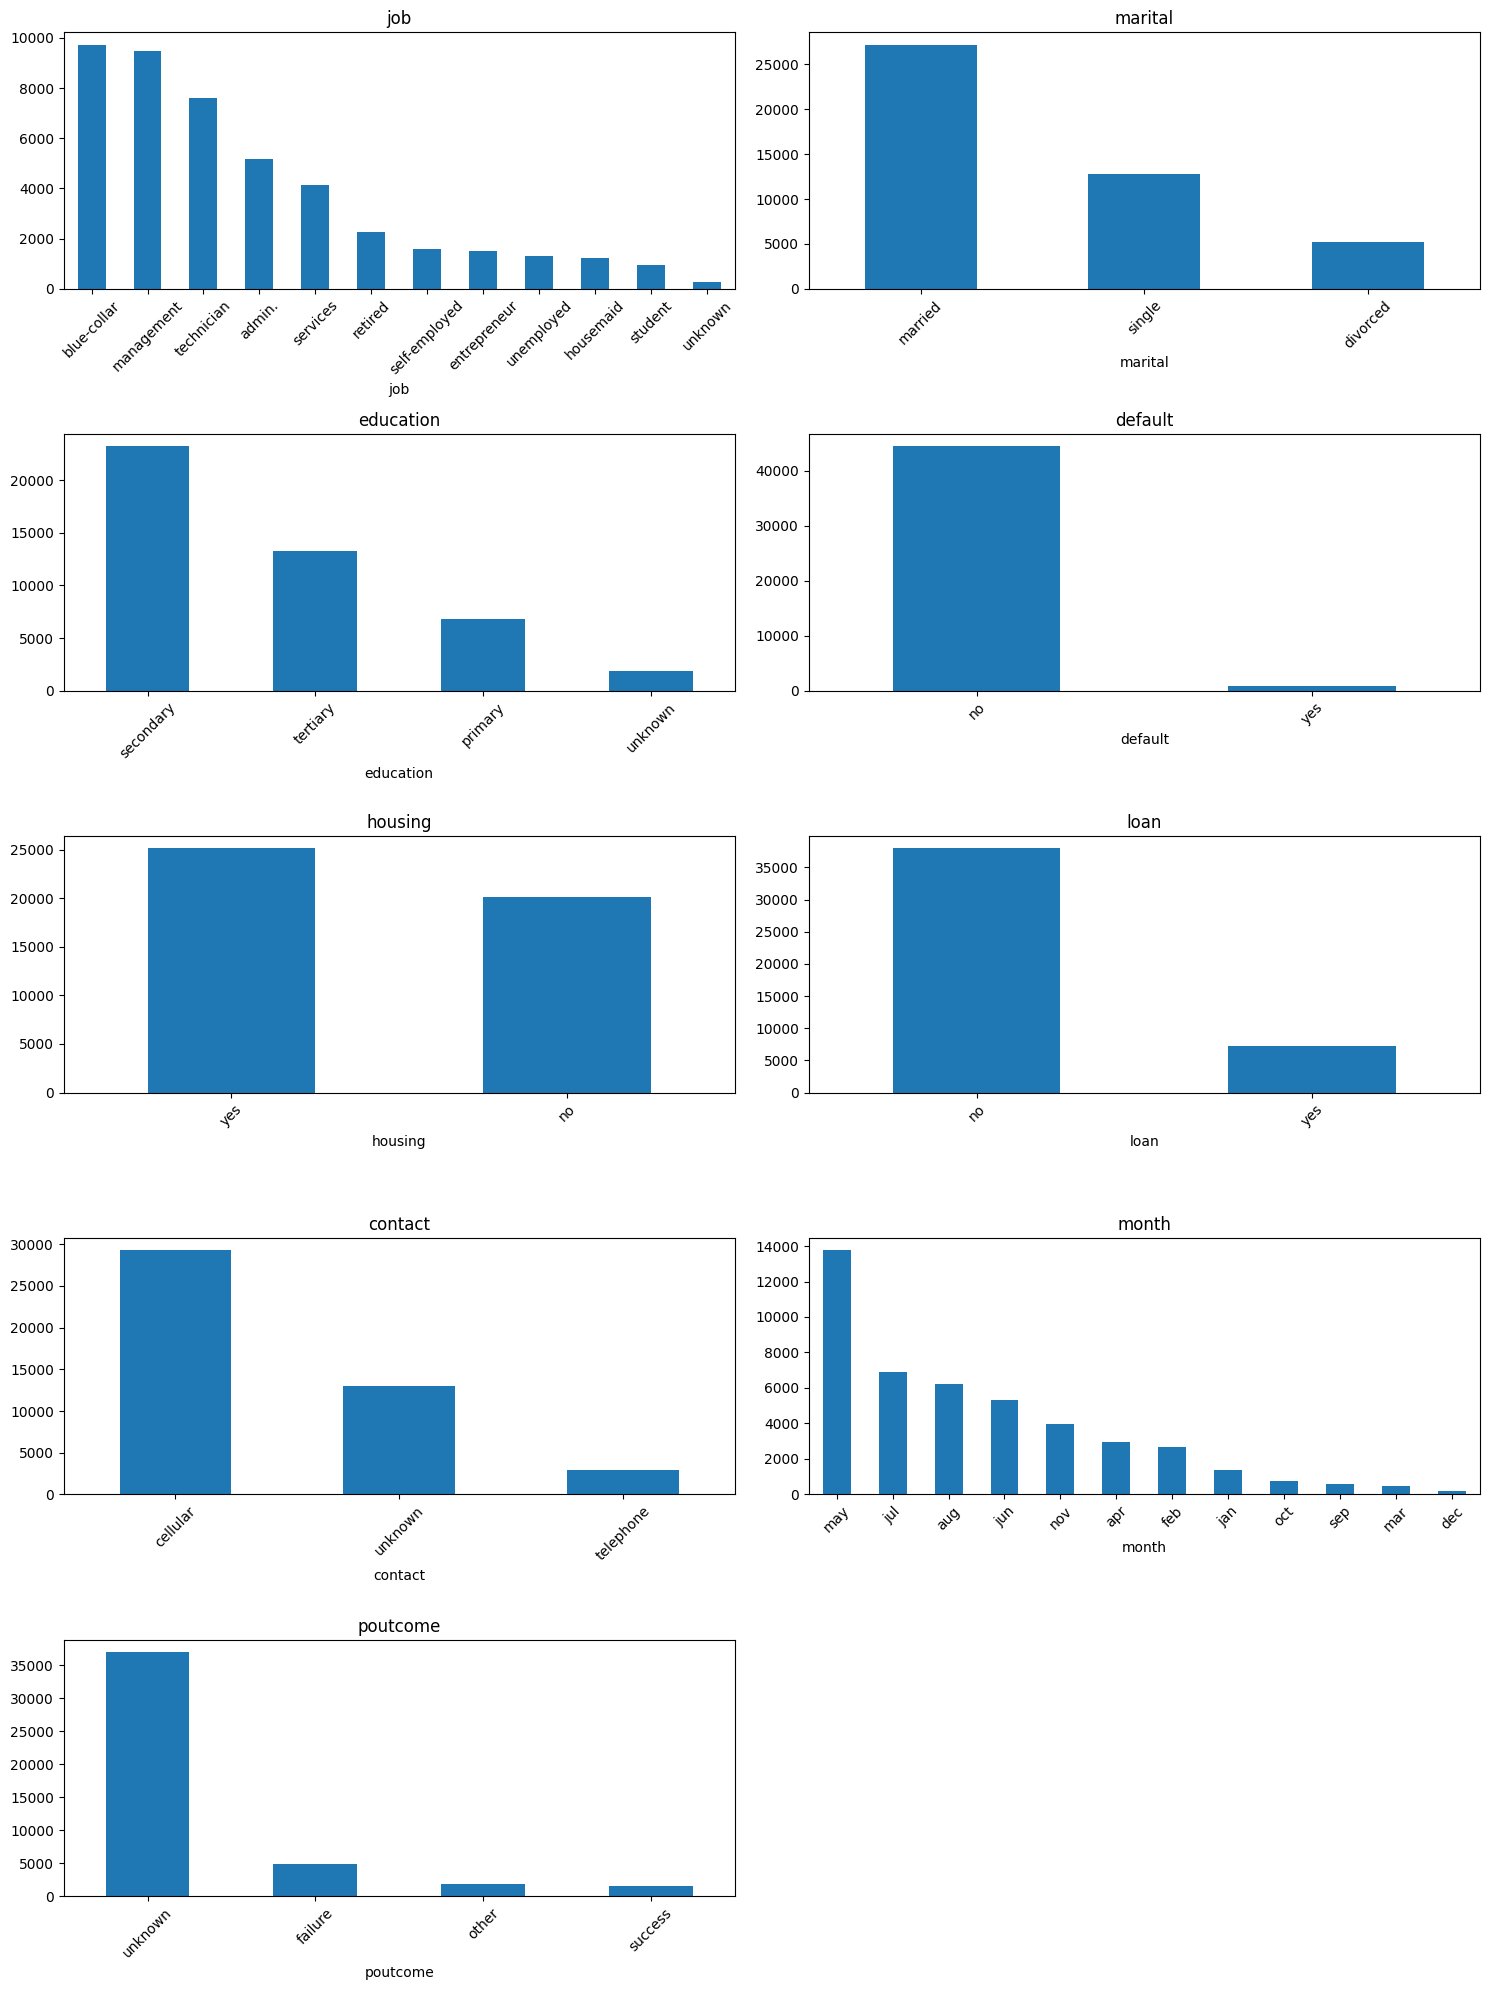

In [69]:
# 3. Análisis de variables categóricas
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 2, i+1)
    data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

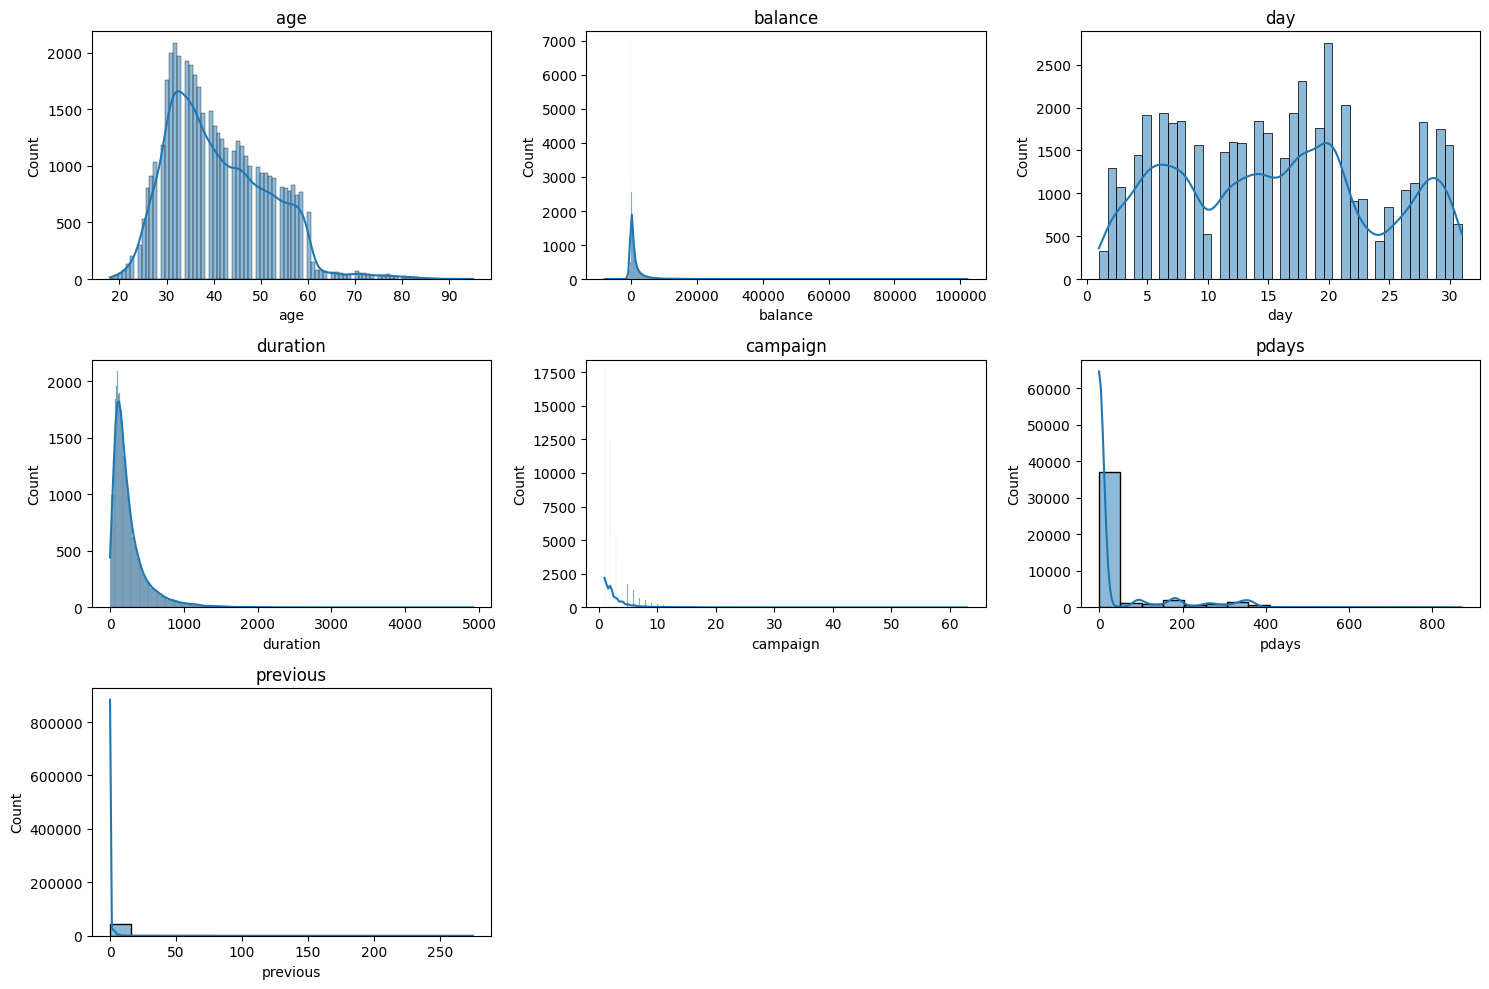

In [63]:
# 4. Análisis de variables numéricas
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

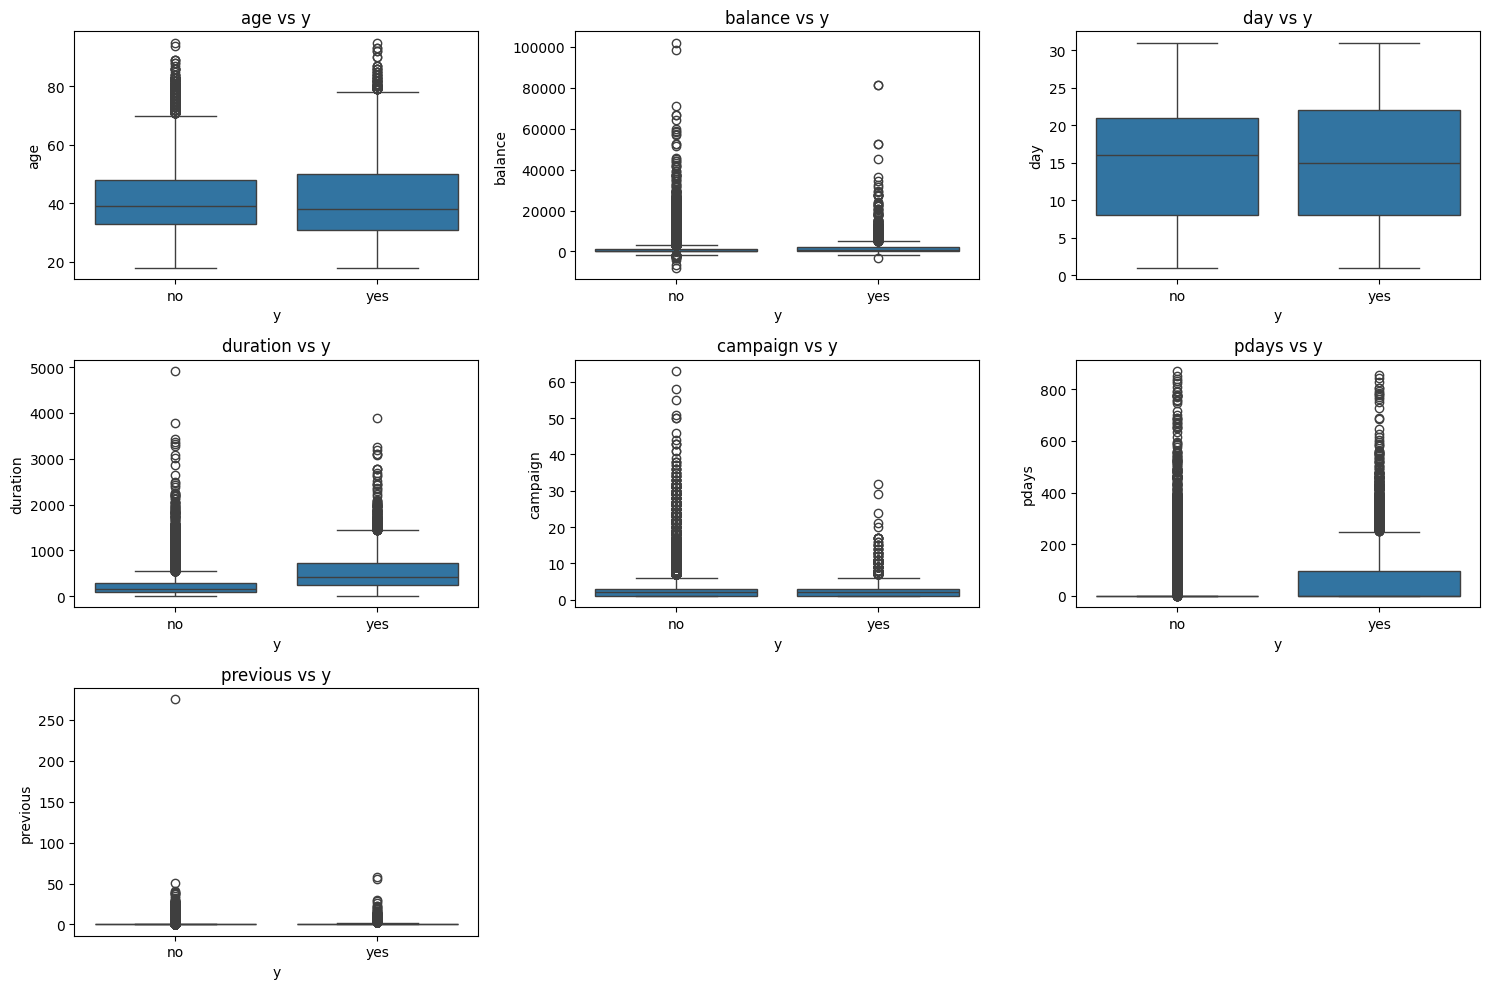

In [64]:
# 5. Relación entre variables numéricas y la variable objetivo
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='y', y=col, data=data)
    plt.title(f'{col} vs y')
plt.tight_layout()
plt.show()

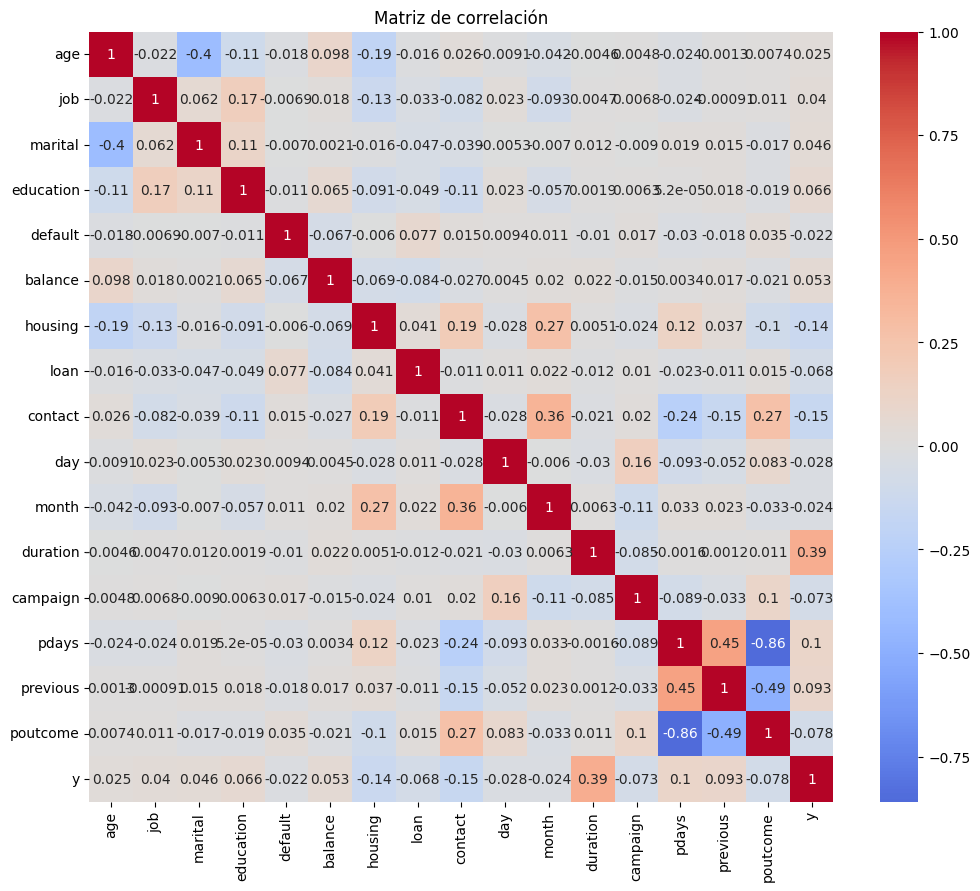

In [65]:
# 6. Matriz de correlación
# Codificar variables categóricas para correlación
data_encoded = data.copy()
le = LabelEncoder()
for col in categorical_cols:
    data_encoded[col] = le.fit_transform(data_encoded[col])
data_encoded['y'] = le.fit_transform(data_encoded['y'])

plt.figure(figsize=(12, 10))
corr = data_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación')
plt.show()

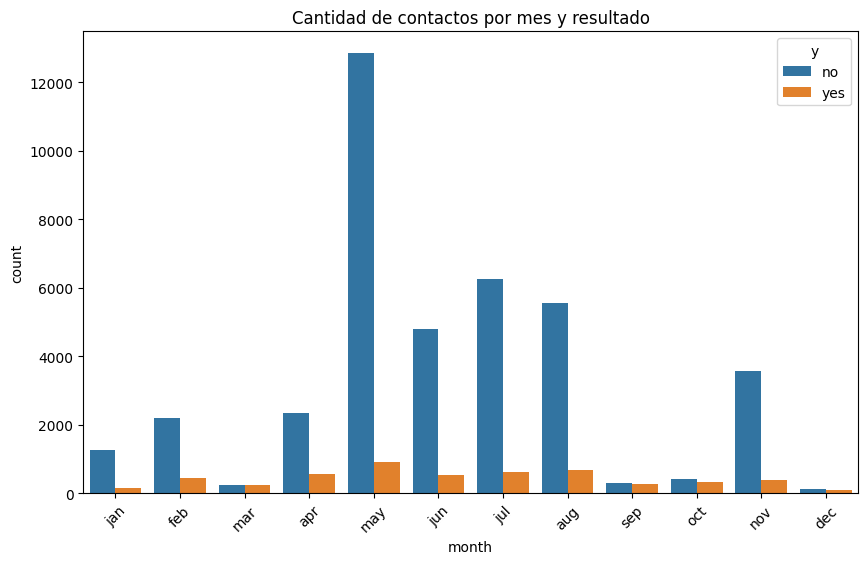

In [66]:
# 7. Análisis de campañas por mes
plt.figure(figsize=(10, 6))
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sns.countplot(x='month', data=data, order=month_order, hue='y')
plt.title('Cantidad de contactos por mes y resultado')
plt.xticks(rotation=45)
plt.show()

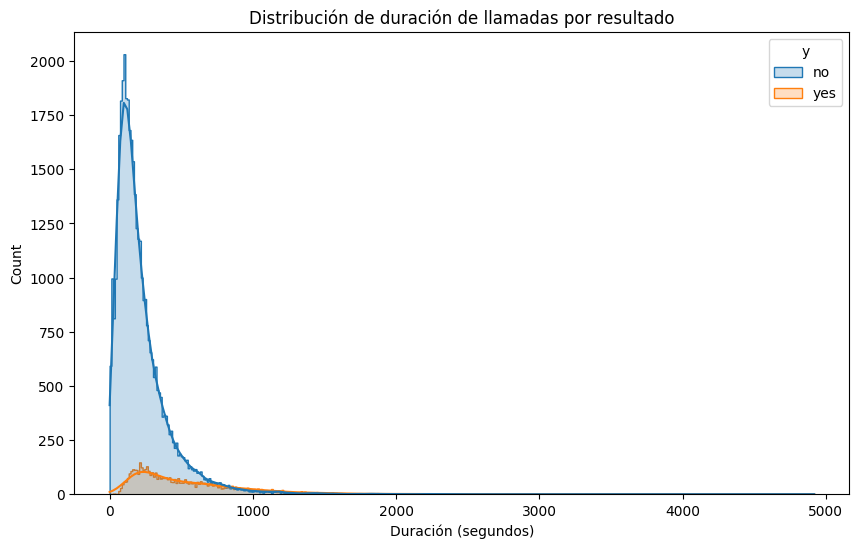

In [67]:
# 8. Duración de llamadas vs resultado
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='duration', hue='y', element='step', kde=True)
plt.title('Distribución de duración de llamadas por resultado')
plt.xlabel('Duración (segundos)')
plt.show()

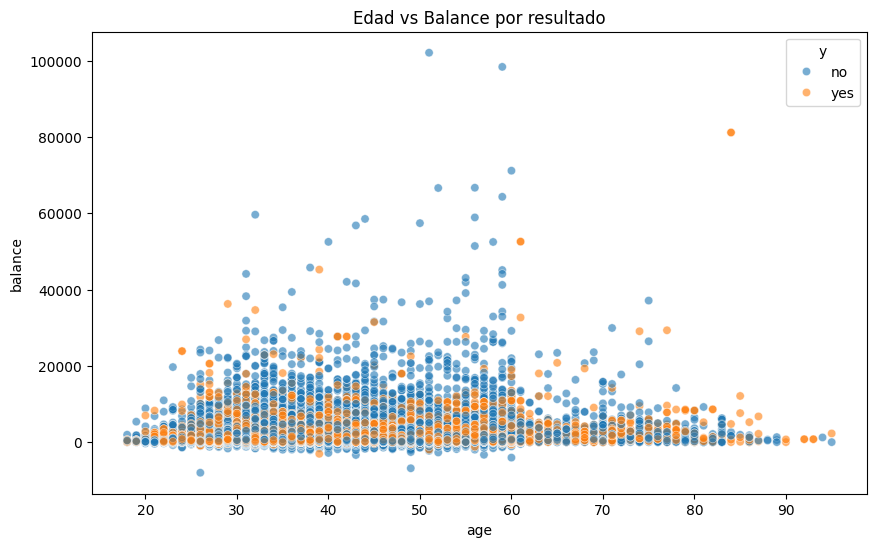

In [68]:
# 9. Edad vs balance por resultado
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', data=data, hue='y', alpha=0.6)
plt.title('Edad vs Balance por resultado')
plt.show()

# **Modelo Machine Learning:**

# **3.1 Extracción y normalización de características:**

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11977
           1       0.66      0.39      0.49      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.68      0.72     13564
weighted avg       0.89      0.90      0.89     13564


Matriz de confusión:
[[11649   328]
 [  961   626]]


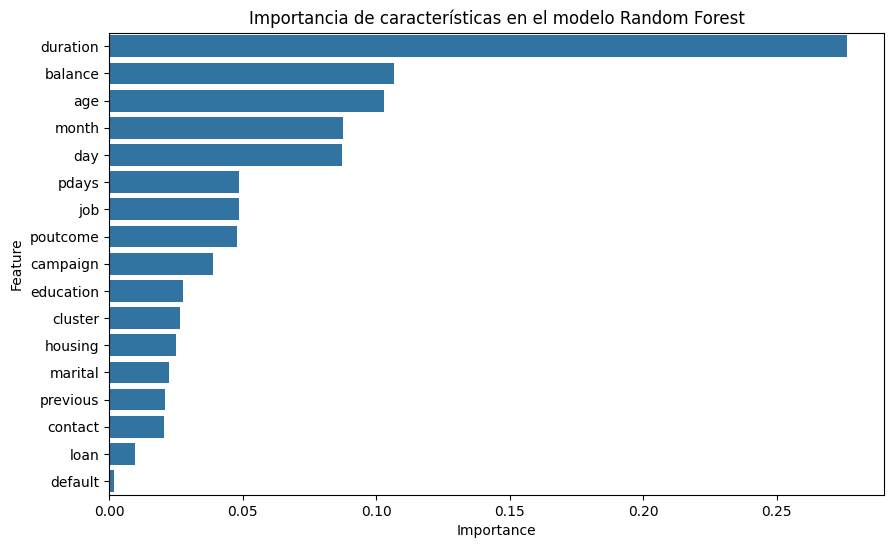

In [71]:
# Preprocesamiento de datos
# Codificación de variables categóricas
data_ml = data.copy()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    data_ml[col] = le.fit_transform(data_ml[col])

# Variable objetivo
data_ml['y'] = le.fit_transform(data_ml['y'])

# Separar características y objetivo
X = data_ml.drop('y', axis=1)
y = data_ml['y']

# Normalización de características numéricas
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Modelo de clasificación: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluación del modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Importancia de características
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importancia de características en el modelo Random Forest')
plt.show()

# **3.2 Clustering con K-Means:**

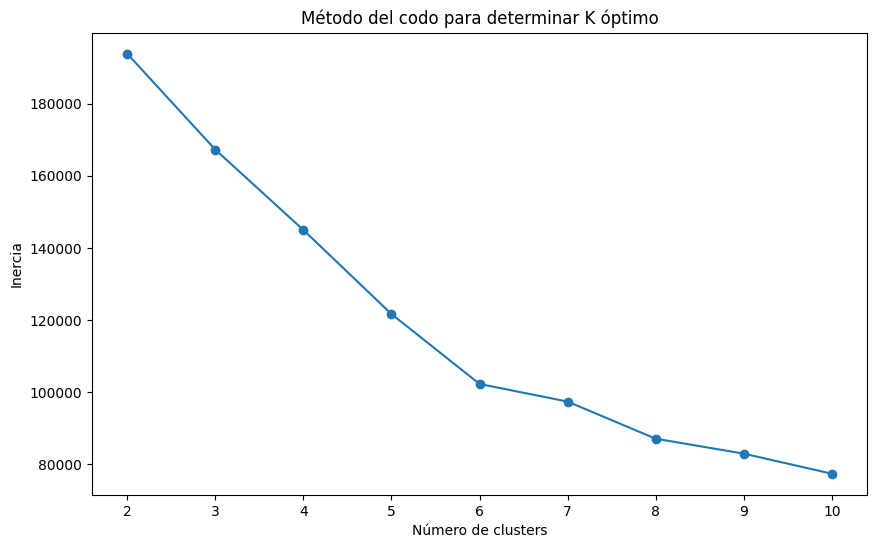


Estadísticas por cluster:
           duration        age       balance        day  campaign
cluster                                                          
0        181.323798  40.298376    990.042034  23.202473  3.579185
1        874.724335  40.849810   1239.325333  15.867158  2.457937
2        204.050197  41.291134    911.360804   9.087556  2.105106
3        242.576669  44.604549  13767.972854  15.899486  2.488628


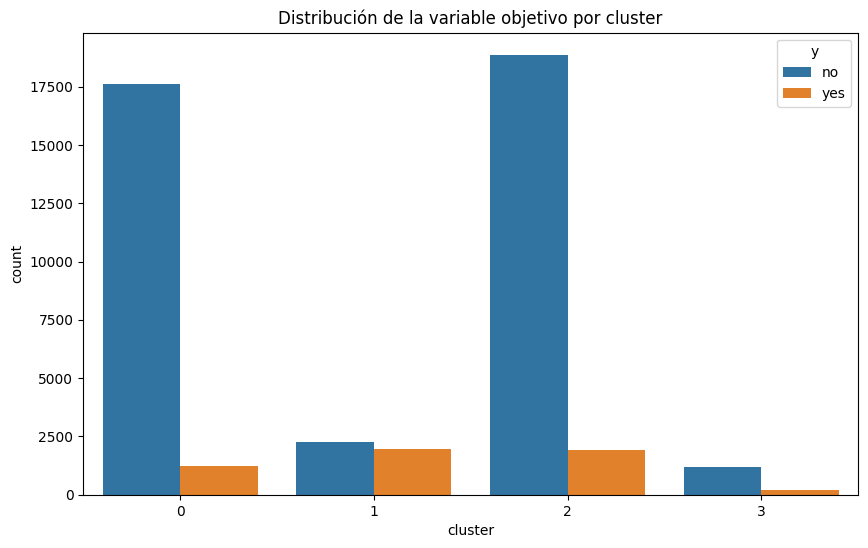

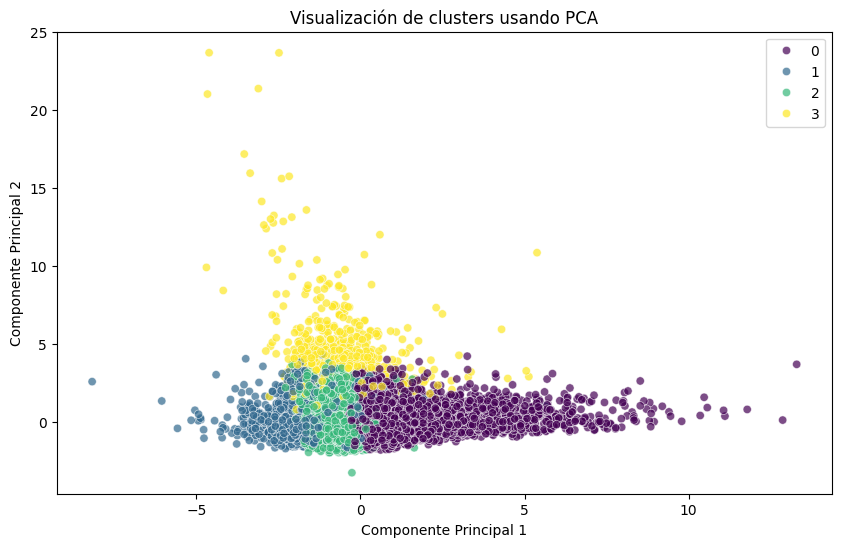


Coeficiente de silueta para K=4: 0.225


In [70]:
# Seleccionar características para clustering (usamos las más importantes según el modelo anterior)
features_for_clustering = ['duration', 'age', 'balance', 'day', 'campaign']
X_cluster = X[features_for_clustering]

# Determinar el número óptimo de clusters usando el método del codo
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Método del codo para determinar K óptimo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

# Aplicar K-Means con K óptimo (según el gráfico)
optimal_k = 4  # Este valor debe ajustarse según el gráfico del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

# Añadir clusters al dataframe original
data['cluster'] = clusters

# Analizar los clusters
# Estadísticas por cluster
cluster_stats = data.groupby('cluster')[features_for_clustering].mean()
print("\nEstadísticas por cluster:")
print(cluster_stats)

# Distribución de la variable objetivo en cada cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', hue='y', data=data)
plt.title('Distribución de la variable objetivo por cluster')
plt.show()

# Visualización de clusters (usando PCA para reducción de dimensionalidad)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', alpha=0.7)
plt.title('Visualización de clusters usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Evaluar calidad del clustering con el coeficiente de silueta
silhouette_avg = silhouette_score(X_cluster, clusters)
print(f"\nCoeficiente de silueta para K={optimal_k}: {silhouette_avg:.3f}")

# **algoritmo de clustering de · DBSCAN (Density-Based Spatial Clustering of Applications with Noise)::**

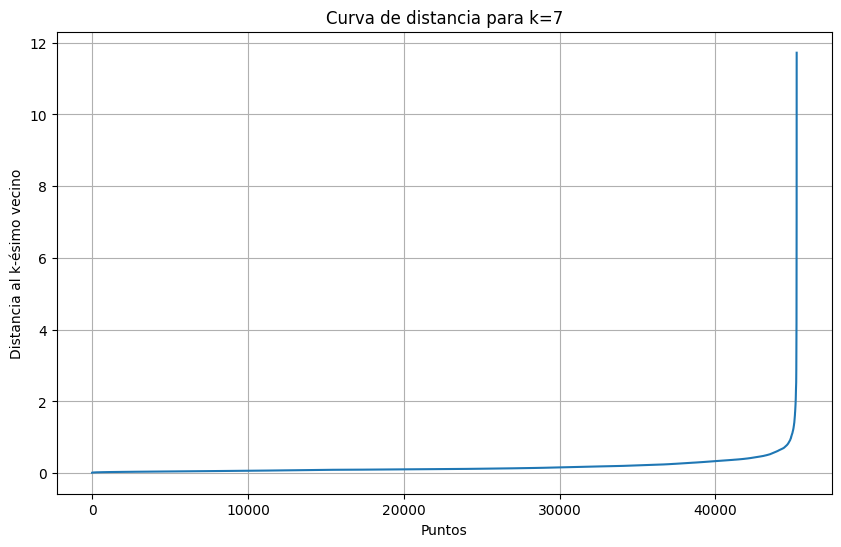


Distribución de puntos por cluster:
-1      124
 0    45064
 1       12
 2       11
Name: count, dtype: int64

Porcentaje de outliers: 0.27%


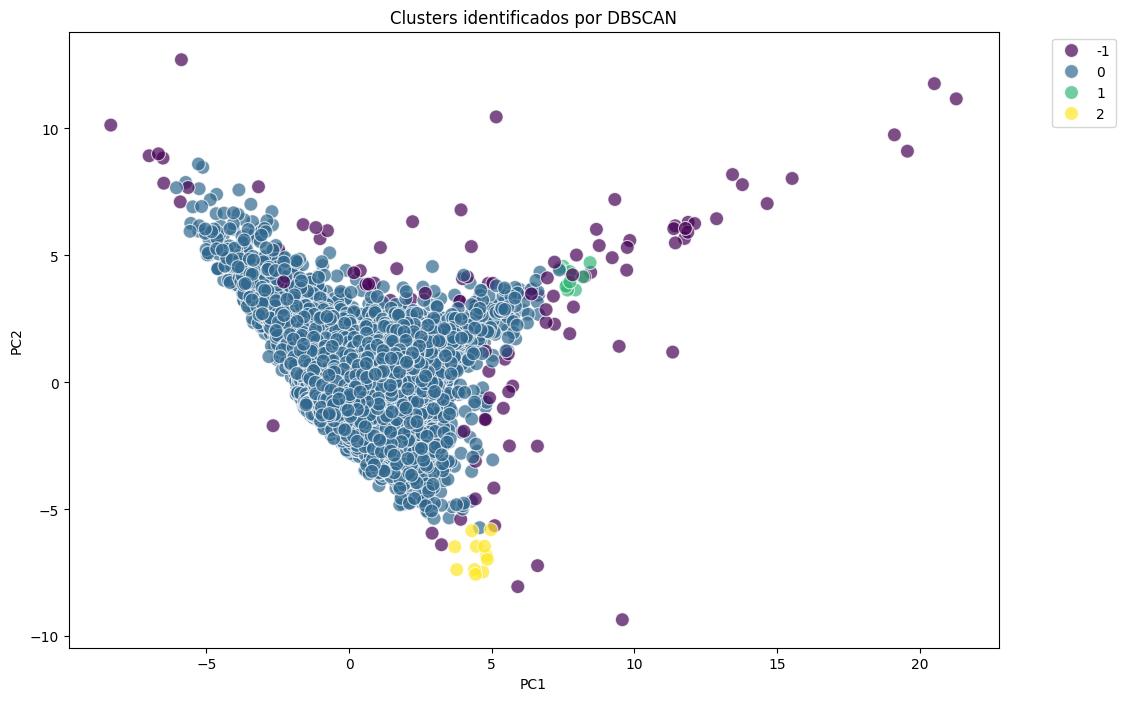

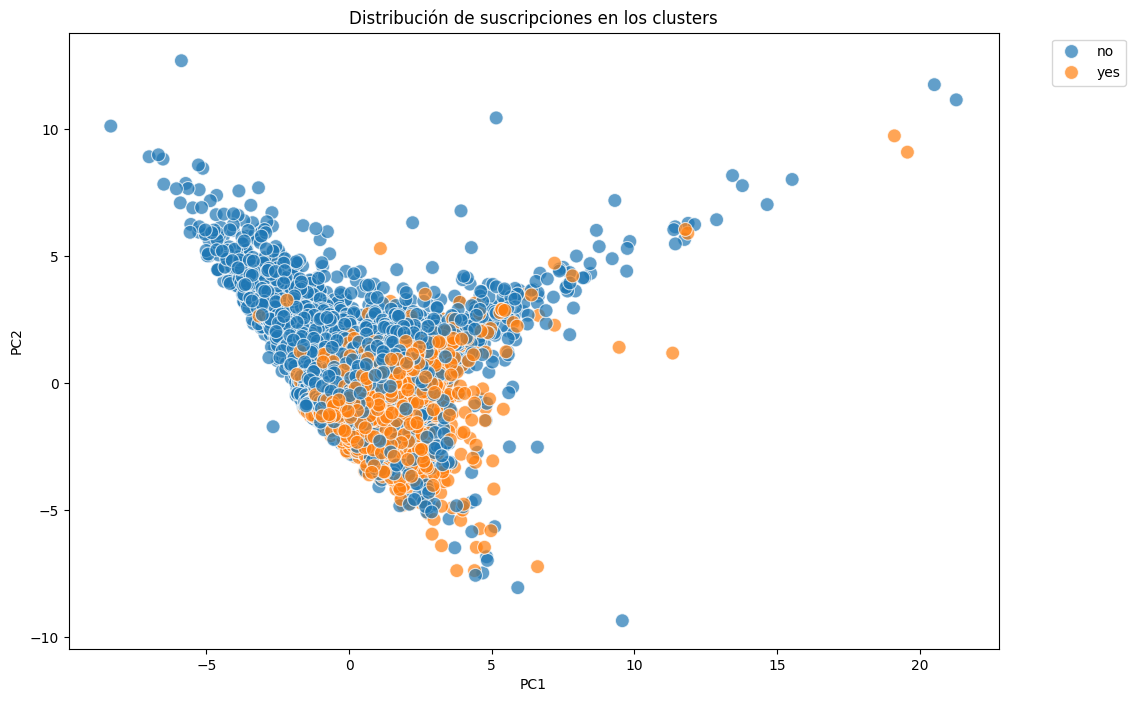


Estadísticas descriptivas por cluster:

Media de age por cluster:
cluster
-1    48.862903
 0    40.911859
 1    51.166667
 2    40.181818
Name: age, dtype: float64

Media de balance por cluster:
cluster
-1    22899.250000
 0     1293.969088
 1    36219.166667
 2      374.727273
Name: balance, dtype: float64

Media de duration por cluster:
cluster
-1     757.056452
 0     256.095997
 1     181.333333
 2    3186.363636
Name: duration, dtype: float64

Media de campaign por cluster:
cluster
-1    11.298387
 0     2.740880
 1     1.416667
 2     2.090909
Name: campaign, dtype: float64

Proporción de suscripciones por cluster:
y              no       yes
cluster                    
-1       0.709677  0.290323
 0       0.883543  0.116457
 1       1.000000       NaN
 2       0.545455  0.454545

Coeficiente de silueta: 0.791

Perfil de los clusters:
               age       balance     duration   campaign   size
cluster                                                        
-1       48.862903

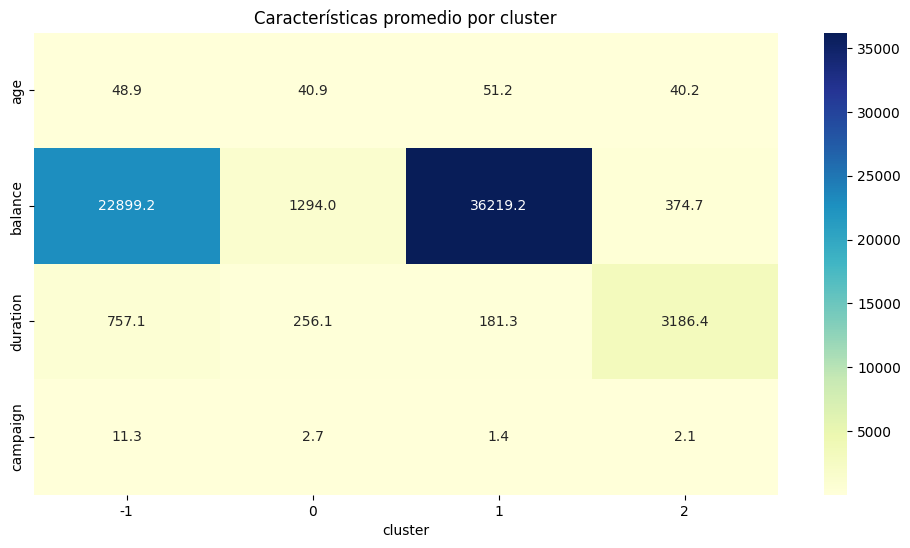

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

## 1. Preprocesamiento de datos

# Cargar los datos
data = pd.read_csv('bank-full.csv', sep=';')

# Seleccionar características relevantes para clustering
features = ['age', 'balance', 'duration', 'campaign']
X = data[features]

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la variable objetivo para visualización
le = LabelEncoder()
y_encoded = le.fit_transform(data['y'])

## 2. Determinación de parámetros óptimos para DBSCAN

# Método del codo para determinar eps (distancia óptima)
def find_optimal_eps(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1], axis=0)
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.title(f'Curva de distancia para k={k}')
    plt.xlabel('Puntos')
    plt.ylabel('Distancia al k-ésimo vecino')
    plt.grid()
    plt.show()
    return distances

# Ejecutar para k = 2*features - 1 (regla general)
k = 2 * len(features) - 1
distances = find_optimal_eps(X_scaled, k)

# Seleccionar eps donde ocurre el "codo" (cambiar según visualización)
eps = 1.2  # Este valor debe ajustarse según la gráfica

## 3. Aplicación de DBSCAN

# Aplicar DBSCAN con los parámetros seleccionados
dbscan = DBSCAN(eps=eps, min_samples=k)
clusters = dbscan.fit_predict(X_scaled)

# Añadir los clusters al dataframe original
data['cluster'] = clusters

# Analizar los resultados
print("\nDistribución de puntos por cluster:")
print(pd.Series(clusters).value_counts().sort_index())

# Porcentaje de outliers (cluster = -1)
outlier_perc = (clusters == -1).sum() / len(clusters) * 100
print(f"\nPorcentaje de outliers: {outlier_perc:.2f}%")

## 4. Visualización de los clusters

# Reducción de dimensionalidad para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear dataframe para visualización
vis_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
vis_df['Cluster'] = clusters
vis_df['Subscription'] = data['y']

# Gráfico de clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=vis_df,
                palette='viridis', alpha=0.7, s=100)
plt.title('Clusters identificados por DBSCAN')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Gráfico de clusters vs suscripción
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Subscription', data=vis_df,
                alpha=0.7, s=100)
plt.title('Distribución de suscripciones en los clusters')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 5. Análisis de los clusters

# Estadísticas por cluster
print("\nEstadísticas descriptivas por cluster:")
for feature in features:
    print(f"\nMedia de {feature} por cluster:")
    print(data.groupby('cluster')[feature].mean())

# Proporción de suscripciones por cluster
print("\nProporción de suscripciones por cluster:")
print(data.groupby('cluster')['y'].value_counts(normalize=True).unstack())

## 6. Evaluación del modelo (solo para clusters no ruido)

# Filtrar puntos que no son ruido (cluster != -1)
valid_points = clusters != -1
if sum(valid_points) > 1:  # Necesitamos al menos 2 clusters para calcular silueta
    silhouette = silhouette_score(X_scaled[valid_points], clusters[valid_points])
    print(f"\nCoeficiente de silueta: {silhouette:.3f}")
else:
    print("\nNo hay suficientes clusters para calcular el coeficiente de silueta")

## 7. Interpretación de los clusters

# Analizar características de cada cluster
cluster_profiles = data.groupby('cluster')[features].mean()
cluster_profiles['size'] = data['cluster'].value_counts().sort_index()

print("\nPerfil de los clusters:")
print(cluster_profiles)

# Visualización de perfiles de clusters
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profiles.drop('size', axis=1).T,
            annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Características promedio por cluster')
plt.show()